<a href="https://colab.research.google.com/github/aps1070-2019/All_Labs_Answers/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### PCA - Project 3

Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. Note that all 12.5 marks for this project are attributed to the exercises. The tutorial is not marked.

Please fill out the following:


*   Your **name**: Hong Yixiao
*   Your **student number**: 1001311145



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [4]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

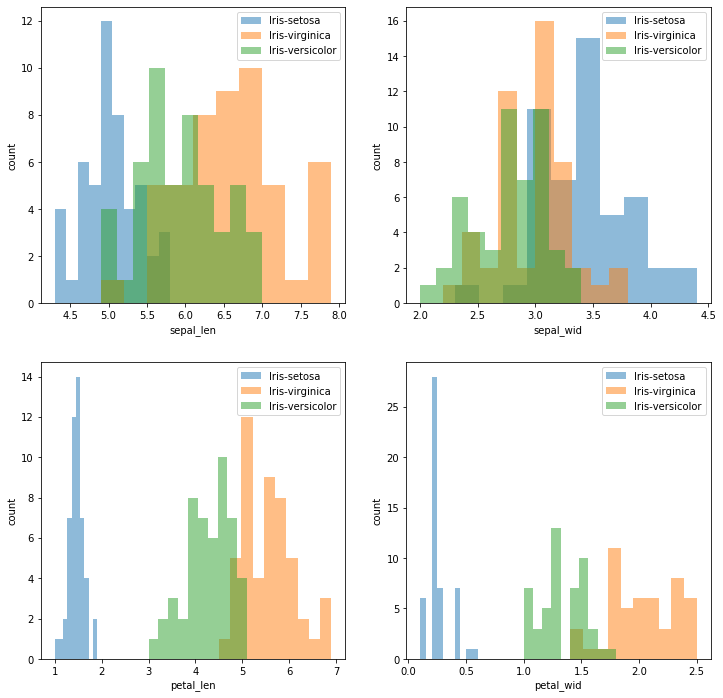

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

# change each column to mean = 0 , variance = 1

In [7]:
X[:, 0].mean(), X_std[:, 0].mean()
#original column 1 mean, standarlized column 1 mean = 0

(5.843333333333334, -4.736951571734001e-16)

In [8]:
X[:, 0].var(), X_std[:, 0].var()

#original column 1 var, standarlized column 1 var = 1

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [9]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

print("Covariance Matrix: \n",C)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

print("\neigenValues=\n",eigenValues)
print("\neigenVectors=\n",eigenVectors)

print("==A*x==\n",
      np.dot(C,np.array([eigenVectors[0][0],eigenVectors[1][0],eigenVectors[2][0],eigenVectors[3][0]])),
      "\n==lumda*x==\n",
      np.dot(np.array([eigenVectors[0][0],eigenVectors[1][0],eigenVectors[2][0],eigenVectors[3][0]]),eigenValues[0]))

Covariance Matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

eigenValues=
 [2.93035378 0.92740362 0.14834223 0.02074601]

eigenVectors=
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
==A*x==
 [ 1.53073365 -0.77172307  1.70327987  1.65744048] 
==lumda*x==
 [ 1.53073365 -0.77172307  1.70327987  1.65744048]


#### Using Singular Vector Decomposition

In [10]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [11]:
n, m = X_std.shape
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?

==> same

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

### Explained Variance

In [13]:
eigValSum = sum(eigenValues)

print(eigValSum)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]

print(expVar)
# show how much percentage of the eigenvalue contributes to the total sum of eigenvalues

cumExpVar = np.cumsum(expVar)
# return the cumulative sum of expVar

cumExpVar

4.02684563758389
[72.77045209380134, 23.030523267680643, 3.6838319576273975, 0.5151926808906315]


array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

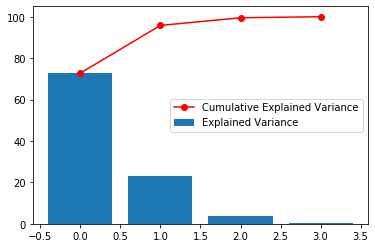

In [14]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

==> two, cumulative explained variance reached 95.8%

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [15]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W
#W is the first two eigenVectors

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [16]:
projX = np.dot(X_std, W)
#X_std project onto W (two eigenvectors)
X.shape, projX.shape

#After projection there are only two features

((150, 4), (150, 2))

plot the projected features in X,Y


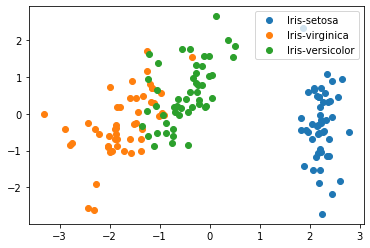

In [17]:
print("plot the projected features in X,Y")
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [18]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=402d8468842e6512ca31899d299518abe1ff8e320628765260cea3b3a62fa6db
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [0]:
# Download and unzip dataset.
# filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
# !tar -xvzf "{filename}" 

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()

In [24]:
type(X), len(X)

(list, 1054)

In [25]:
type(X[0]), X[0].shape
#each image 250*250 pixels

(numpy.ndarray, (250, 250))

In [26]:
type(y), len(y)

(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Andre_Agassi


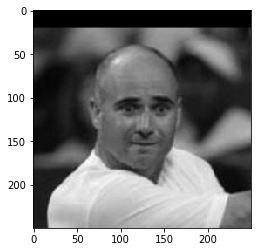

In [27]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

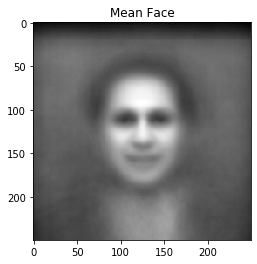

In [29]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
#This function retures required eigenvalues to acieve required variance
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            print(idx)
            return idx
        
def pca(X, y):
    n, d = X.shape
    #n is rows, d is dimensions
    mu = X.mean(axis=0) #get all mean for all dimensions
    X = X - mu # standardising data, each data - mean
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [31]:
eigenValues, eigenVectors, mean = pca(XMat, y)

298
Number of useful eigenBasis are:  298


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). (62500 pixels for each image)

In [33]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

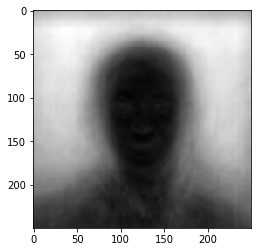

In [34]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

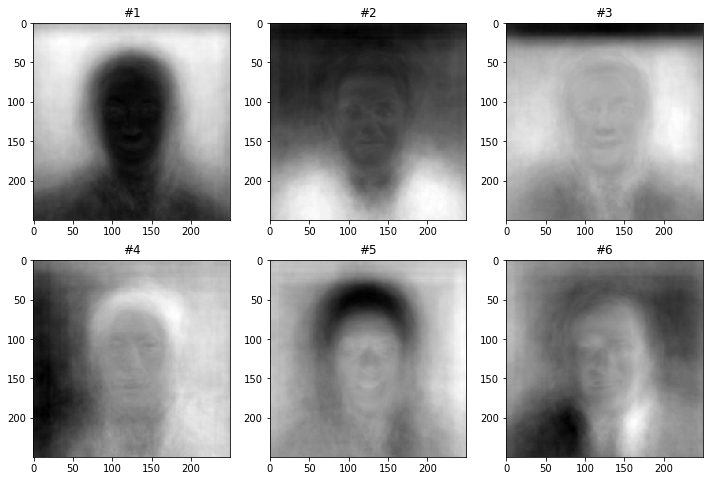

In [35]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
**choose the eigenface which has white hair and multiply a scale(weight) and add it onto the existing face**
2. Answer the same for black hair.
**choose the eigenface which has black hair and multiply a scale(weight) and add it onto the existing face**

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**
**The first 6 eigen faces has very obvious features for example the first one has white hair and white face, the second one has black hair and black face, while the next 6 eigenfaces has less obvious features compairing to the first 6 eigenfaces**

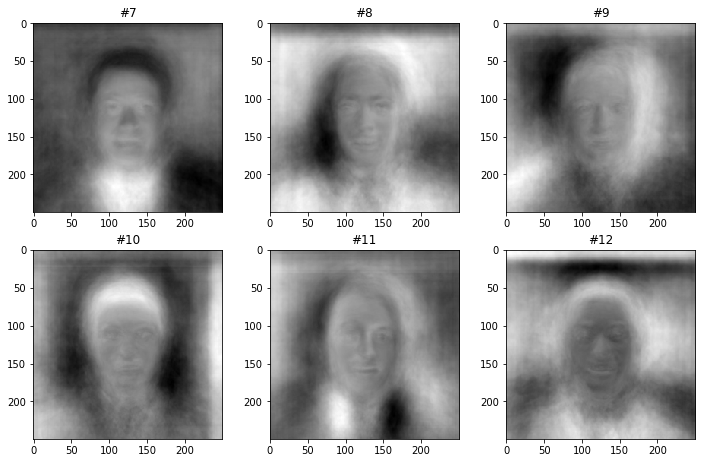

In [36]:
# print next 6 eigen faces
COUNT = 12
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(6, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

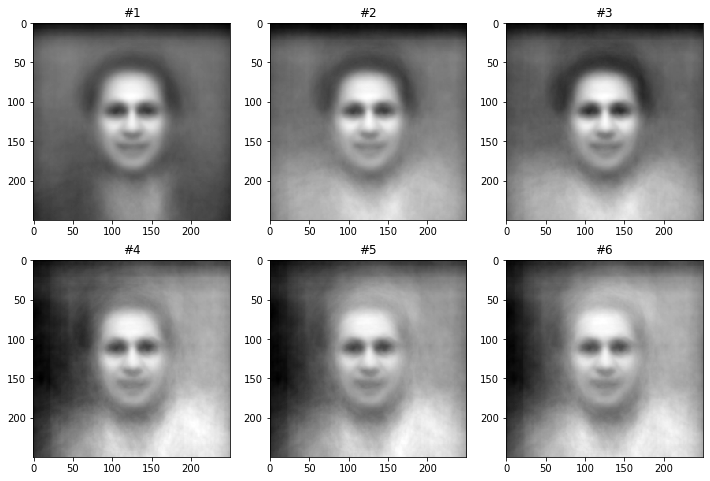

In [40]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

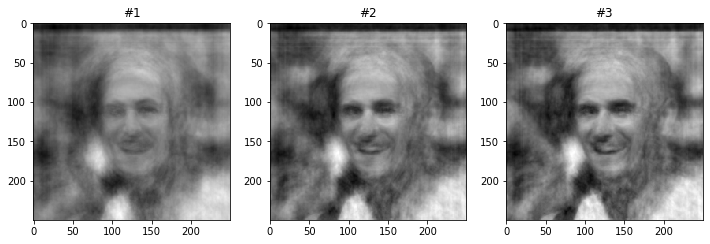

In [42]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

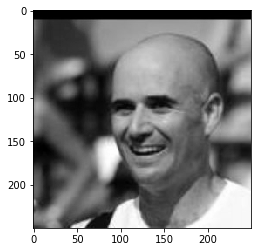

In [43]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

**Yes, it includes the most significant features**

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

In [44]:
import pandas as pd

#download the csv and impor the data as Dataframe, impliment thousands to eliminate the ',' in the data
df = pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv", thousands = ',')
print(df.info)
#df.head(30)
display(df)

<bound method DataFrame.info of     TB prevalence, all forms (per 100 000 population per year)  ...  2007
0                                          Afghanistan          ...   238
1                                              Albania          ...    22
2                                              Algeria          ...    56
3                                       American Samoa          ...     5
4                                              Andorra          ...    19
..                                                 ...          ...   ...
202                                   Wallis et Futuna          ...    25
203                                 West Bank and Gaza          ...    31
204                                              Yemen          ...   130
205                                             Zambia          ...   387
206                                           Zimbabwe          ...   714

[207 rows x 19 columns]>


,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[1] **Shown below**
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5] **Yes I do saw several recurring patterns such as: monotonic decreasing patterns, monotonic increasing patterns, peak in the middle, valley in the middle, oscillations, etc**

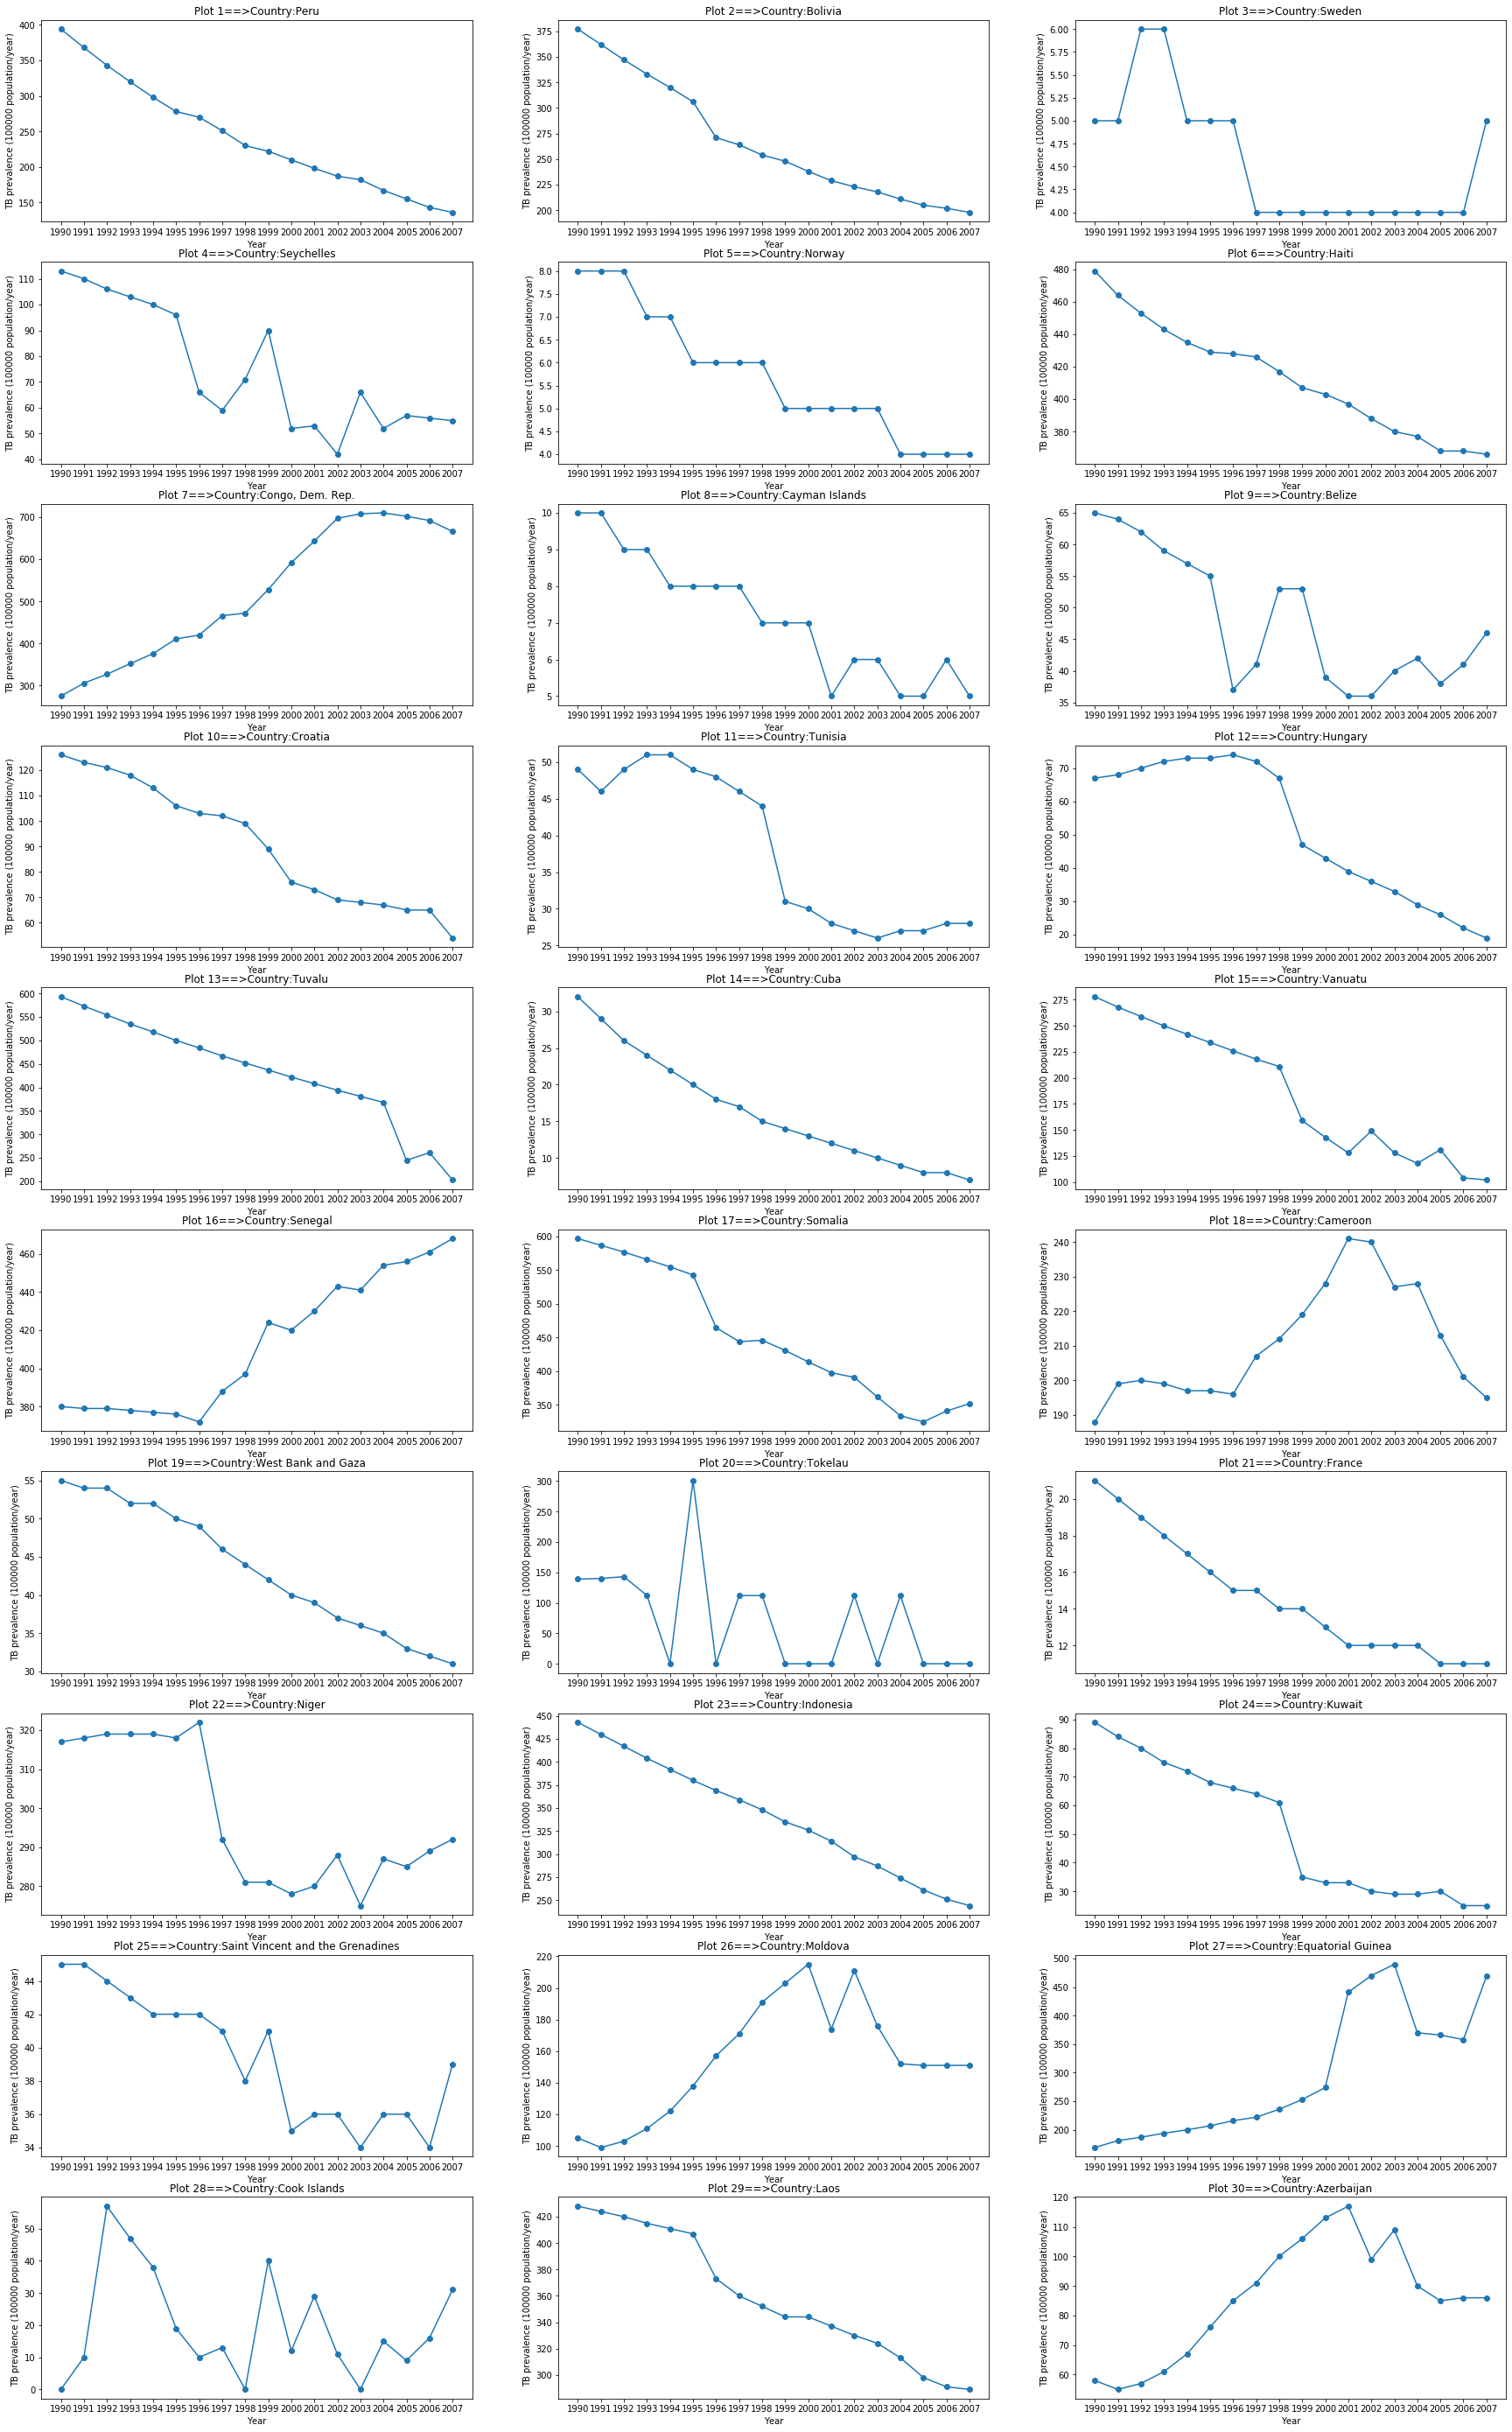

In [45]:
#select 30 random samples from the sataset
df_sample = df.sample(n=30)
#print("==>Here are the 30 selected samples:\n")
#display(df_sample)

import matplotlib.pyplot as plt

#adjust figure size
fig = plt.figure(figsize=(30, 50))

#select years into np array as type of int
X_years = df_sample.columns[1:].astype(int)

#make the loop for the 30 plots
for i in range(len(df_sample)):
  #make the subplot
  plt.subplot(10,3,i+1)
  #collect single row data (include the country name in entry 0 and the rest entries with data)
  singleDataRow = df_sample.iloc[i]
  #collect the country name of the selected row data
  countryName = singleDataRow.values[0]
  #collect y values
  Y_data = singleDataRow.values[1:].astype(int)
  #adjust the scale of the x axis be 1year/step
  plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
  #make the plot
  plt.plot(X_years,Y_data,marker='o')
  #add lables
  plt.xlabel("Year")
  plt.ylabel("TB prevalence (100000 population/year)")
  #add title
  titleStr = "Plot " + str(i+1) + "==>Country:" + countryName
  plt.title(titleStr)



### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[1]  
**Answer:  See plots below**
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5]
**Answer:  Each component represent a feature in which all the data varies in that "direction". Those components with higher variences represents a more important feature components of the dataset. The more principle components we choose the more completed reconstruct we can perform to build a data point in the dataset.Using all the components,  we can reconstruct any data point in the dataset. In our example, the first principle component has a trend of increasing and than decreasing, which means all the data in the dataset varies most in this trend.**

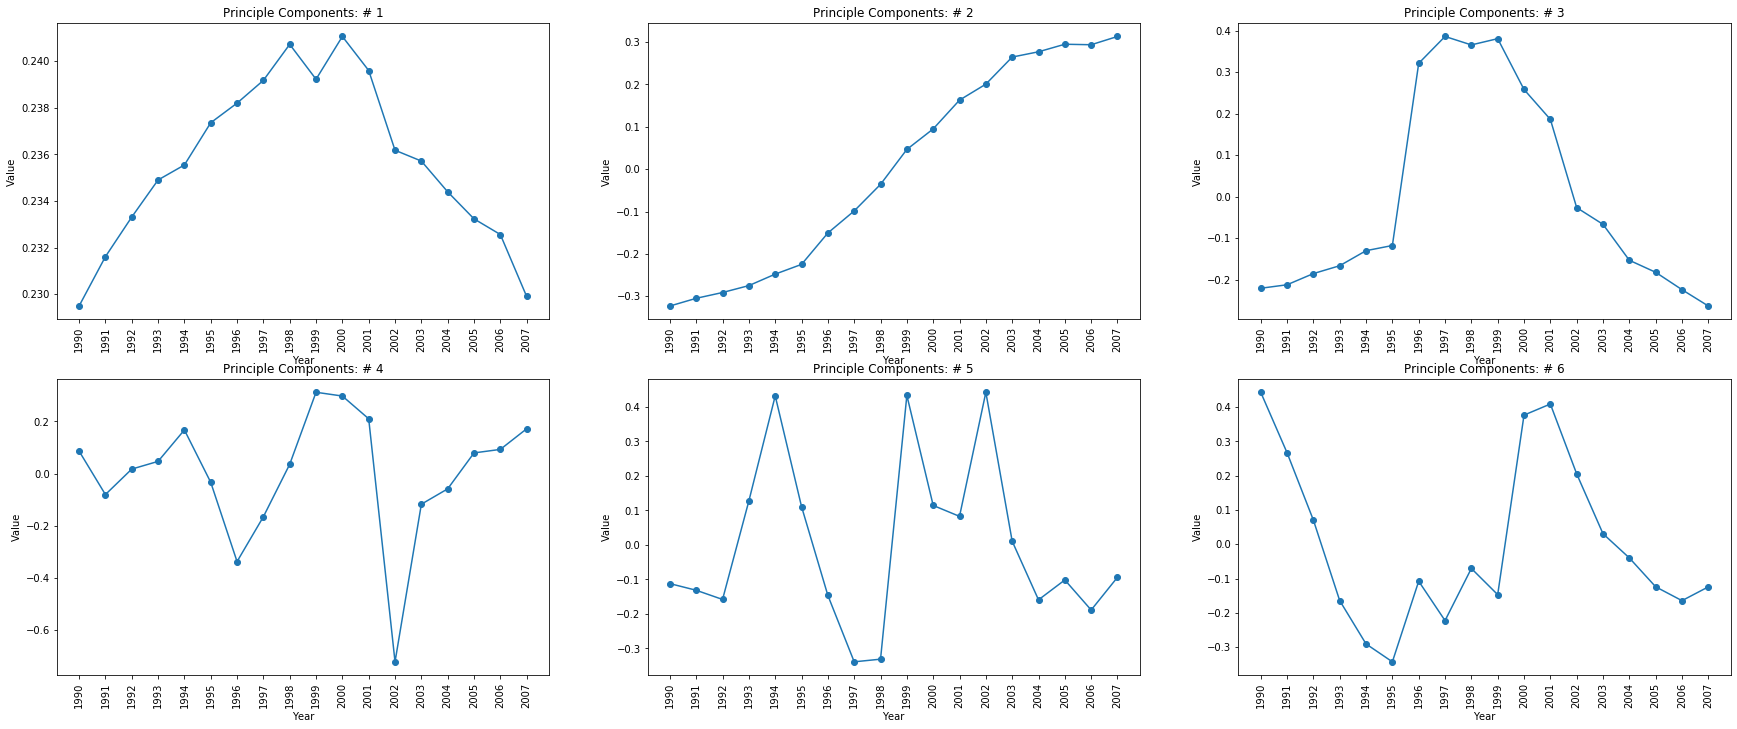

In [46]:
#Tuturial Reference:
# n, m = X_std.shape
# # Compute covariance matrix
# C = np.dot(X_std.T, X_std) / (n-1) 
# # or C = np.cov(X_std.T)
# print("Covariance Matrix: \n",C)
# # Eigen decomposition
# eigenValues, eigenVectors = np.linalg.eig(C) 
# eigenVectors, eigenValues

#Get an array with 30 rows and 18 column features
DataMatrix = df.iloc[:,1:].values.astype(int) #select all rows and only columns from 1:
CountryList = df.iloc[:,0].values #select all rows and only 0 column
Row, Col = DataMatrix.shape #Extract the #row and # cols
DataMatrix_std = StandardScaler().fit_transform(DataMatrix) # standardlize the data matrix
CovMatrix = np.dot(DataMatrix_std.T, DataMatrix_std)/ (Row-1) #calculate the covariance matrix 
eigenValues, eigenVectors = np.linalg.eig(CovMatrix) # eigen decomposition
#print(EigenValues)
#print(EigenVectors)
# sort eigenVectors in descending order by their eigenValue
idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx] #get sorted eigenValues
eigenVectors = eigenVectors[:, idx] #get sorted eigenVectors

#adjust figure size
fig = plt.figure(figsize=(30, 12))

#select years into np array as type of int
X_years = df_sample.columns[1:].astype(int)

#make the loop for the 6 plots of the principle eigenvectors
for i in range(6):
  #make the subplot
  plt.subplot(2,3,i+1)
  #Get Single Eigenvector data
  Y_data = eigenVectors[:,i]
  #adjust the scale of the x axis be 1year/step
  plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
  #make the plot
  plt.plot(X_years,Y_data,marker='o')
  #add lables
  plt.xlabel("Year")
  plt.ylabel("Value")
  plt.xticks(rotation = 90)
  #add title
  titleStr = "Principle Components: # " + str(i+1)
  plt.title(titleStr)


### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[1] 
**Picked the interested data as data of Canada (shown below)**

2. Next, show its incremental reconstruction using the first 1-6 components (again plotted as a time series in a 3 plots/row format).[1]

**Reconstructed plot using first 6 principle components shown below**

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components.[1]

**RMSE plot shown below**

====>The country of interest:


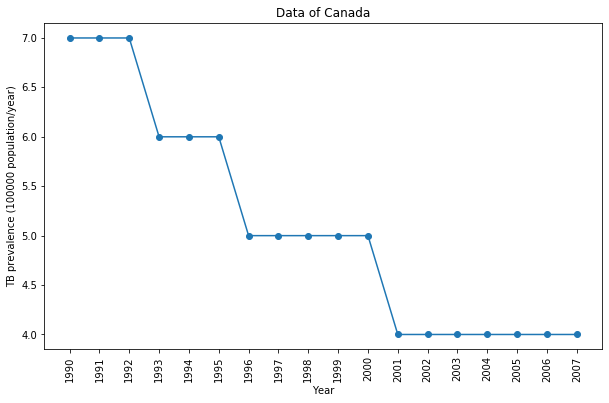

In [47]:
print("====>The country of interest:")
#Try to find the data for Canada as data of my interest
canada=df.loc[df['TB prevalence, all forms (per 100 000 population per year)'] == 'Canada'].values.tolist()
#prepare the plot
canada_data = np.array(canada[0][1:]).astype(int)

fig = plt.figure(figsize=(10, 6))
#adjust the scale of the x axis be 1year/step
plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
plt.plot(X_years,canada_data,marker='o')
plt.xticks(rotation = 90)
#add lables
plt.xlabel("Year")
plt.ylabel("TB prevalence (100000 population/year)")
#add title
titleStr = "Data of " + canada[0][0]
plt.title(titleStr)
plt.show()


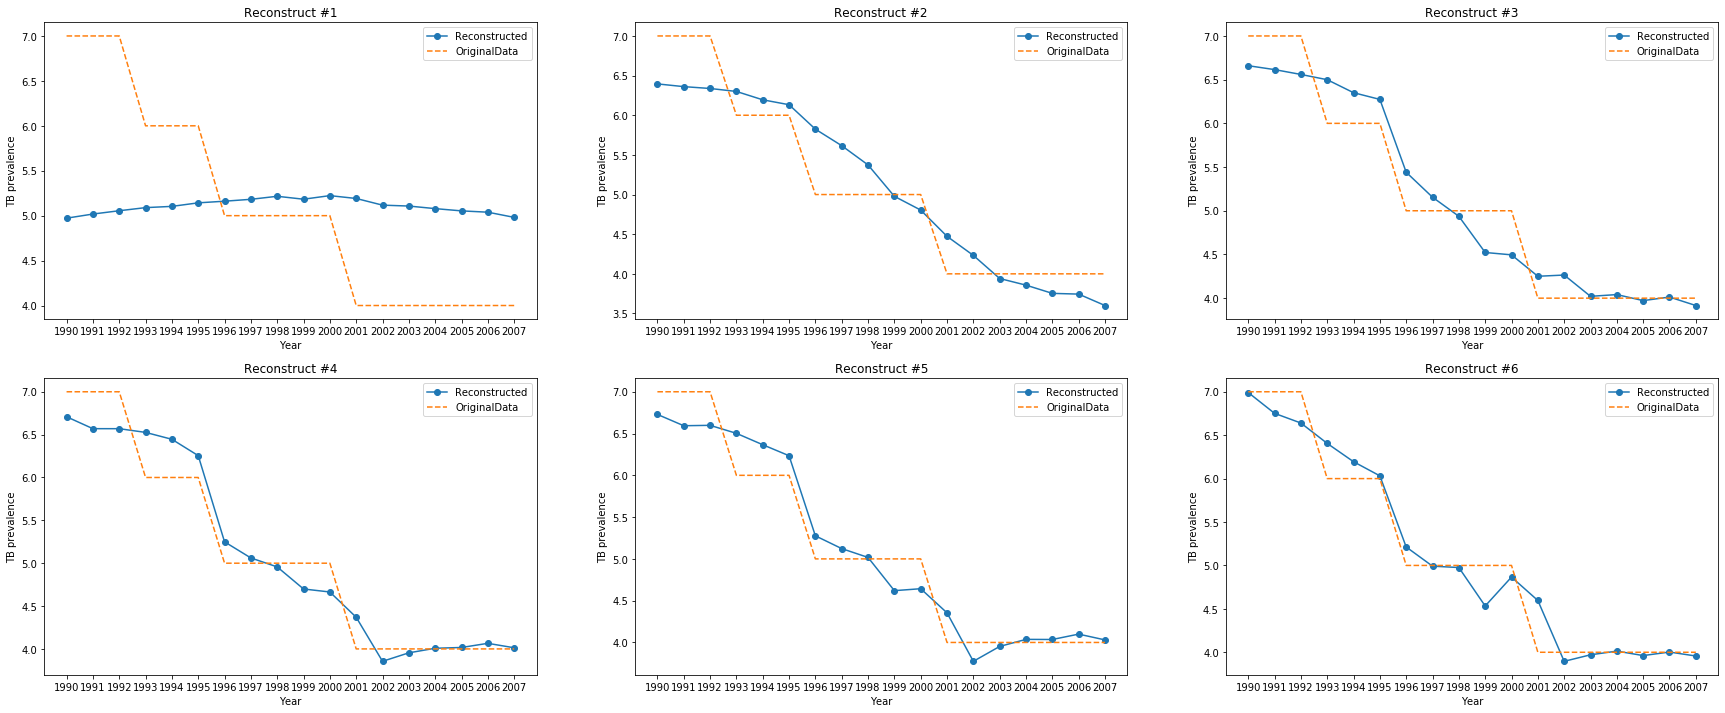

In [48]:
#Now we project the chosendata to eigenvector 

#From tutorial
# # create reconstructed images
# COUNT = 6 # count of first eigenVectors used to reconstruct the image
# reconImages = []
# for numEvs in range (1, COUNT+1):
#     P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
#     R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
#     reconImages.append(R.reshape(X[0].shape))
# # plot reconstructed images
# ROWS = math.ceil(COUNT/3)
# fig = plt.figure(figsize=(12, ROWS * 4))
# for i in range(0, COUNT):
#     plt.subplot(ROWS, 3, i+1)
#     plt.imshow(reconImages[i], cmap = plt.cm.gray)
#     plt.title('#{}'.format(i+1))

COUNT = 6 # count of first eigenVectors used to reconstruct the image
#calculate the mean of the entire dataset
mean= DataMatrix_std.mean(axis=0)
#print(mean)
reconstructList = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], np.array(canada_data).reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconstructList.append(R.reshape(DataMatrix[0].shape))

#adjust figure size
fig = plt.figure(figsize=(30, 12))

# plot reconstructed data
#adjust figure size
for i in range(0, COUNT):
    plt.subplot(2, 3, i+1)
    #adjust the scale of the x axis be 1year/step
    plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
    plt.plot(X_years,reconstructList[i],marker='o',label="Reconstructed")
    plt.plot(X_years,canada_data,linestyle = '--',label="OriginalData")
    #add lables
    plt.xlabel("Year")
    plt.ylabel("TB prevalence")
    #add title
    titleStr = "Reconstruct #" + str(i+1)
    plt.legend()
    plt.title(titleStr)



===>Conclusion, the RMSE value is decreasing with more components added up!



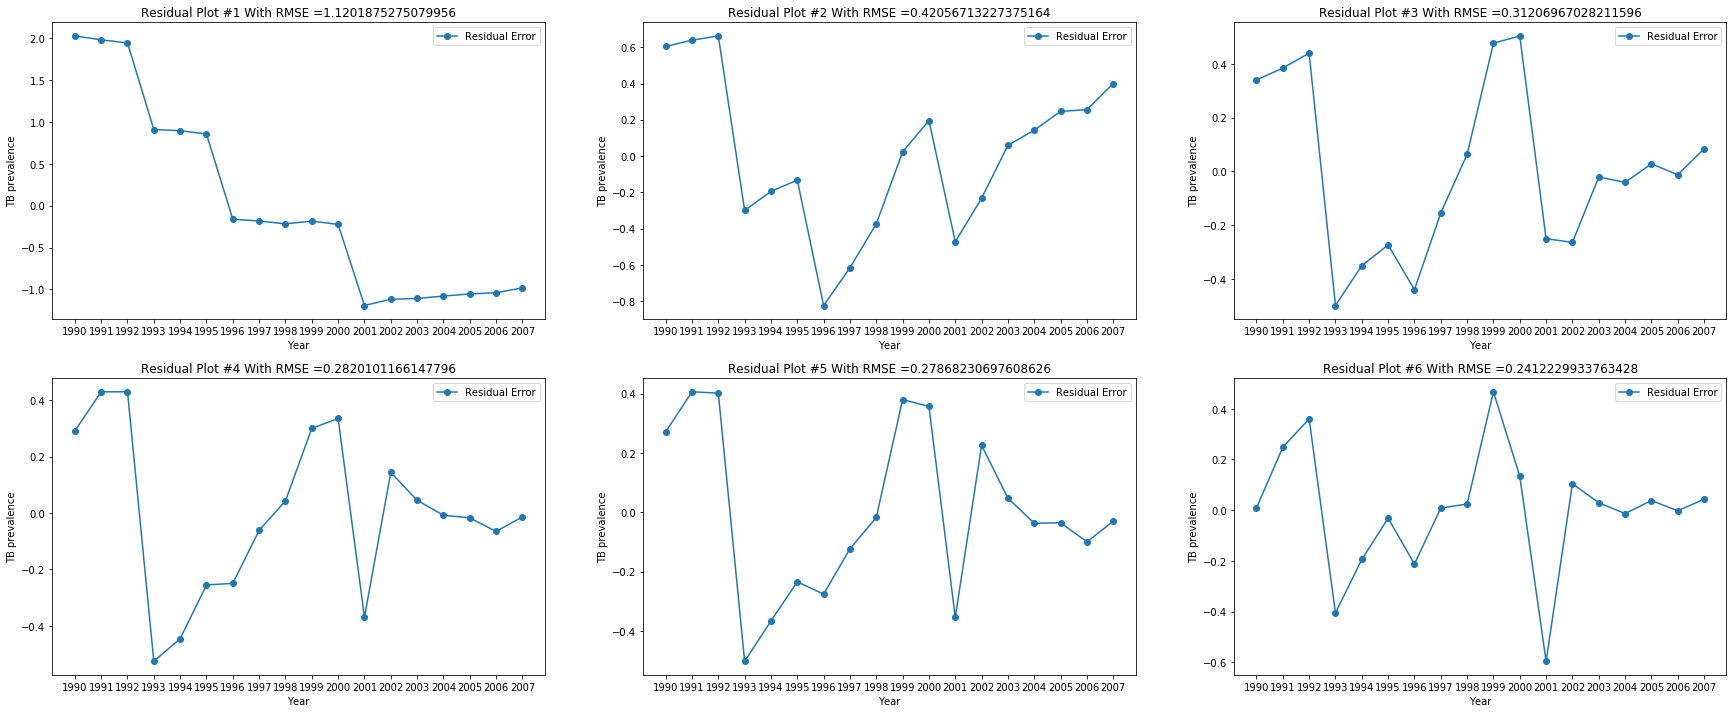

In [49]:
#Now we perform the RMSE plots:
#import the necessary libs
from sklearn.metrics import mean_squared_error
from math import sqrt
#use for loop to calculate residual valuse for each plot

#emply list to record RMSE and residualVals for each plot
RMSE = []
residualVals = []
#adjust figure size
fig = plt.figure(figsize=(30, 12))
for i in range(0, COUNT):
  #since residual is the difference between (actualVal - expectedVal)
  this_residual = canada_data - reconstructList[i]
  residualVals.append(this_residual)
  #calculate RMSE
  RMSE.append(sqrt(mean_squared_error(canada_data,reconstructList[i])))

  #do the plots
  plt.subplot(2, 3, i+1)
  #adjust the scale of the x axis be 1year/step
  plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
  plt.plot(X_years,residualVals[i],marker='o',label="Residual Error")
  #add lables
  plt.xlabel("Year")
  plt.ylabel("TB prevalence")
  #add title
  titleStr = "Residual Plot #" + str(i+1) + " With RMSE =" + str(RMSE[i])
  plt.legend()
  plt.title(titleStr)

print("===>Conclusion, the RMSE value is decreasing with more components added up!\n")

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[1]  

**Choose the first 11 principle eigenvalues (k=11)**
2. How many did you choose and why?[1]
**From the plot we can tell that with the first 11 eigenvalues has significant weight than the reset members, from the cumulated explained variance plot, we can further conclude that the first 11 eigenvalues consist over 99.9% (99.91%) of the cumulated variance which would be enough to reconstruct the data well**

===>Print the eigenvalues of the first 18:



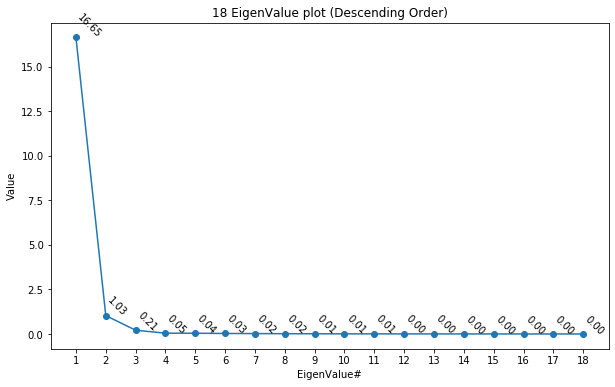





present the plot for the Cumulative Explained Variance


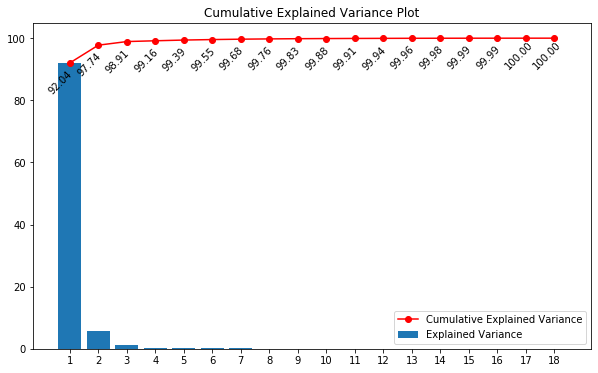

From the plot we can tell that with the first 11 eigenvalues we acieved a cumulated  explained variance of over 99.9% (99.91%).
 thus picking the first 11 eigenvalues can be a good choice


In [50]:
print("===>Print the eigenvalues of the first 18:\n")
#calculate the cumulated eigenvalue sum with code from tutorial:
eigValSum = sum(eigenValues)
#print(eigValSum)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
#print(expVar)
# show how much percentage of the eigenvalue contributes to the total sum of eigenvalues
cumExpVar = np.cumsum(expVar)
# return the cumulative sum of expVar
#adjust figure size
fig = plt.figure(figsize=(10, 6))

#adjust the scale of the x axis be 1/step
plt.xticks(np.arange(0,19,1))
#make the plot
plt.plot(np.arange(1,19),eigenValues,marker='o')
#add lables
plt.xlabel("EigenValue#")
plt.ylabel("Value")
#add title
titleStr = "18 EigenValue plot (Descending Order)"
plt.title(titleStr)
#annotate each point
for a in range(18):
  plt.annotate("{0:.2f}".format(eigenValues[a]),xy=(a+1,eigenValues[a]), rotation = -45)
plt.show()


print("\n\n=====================================================\n\n")
print("present the plot for the Cumulative Explained Variance")
#adjust figure size
fig = plt.figure(figsize=(10, 6))
#adjust the scale of the x axis be 1/step
plt.xticks(np.arange(1,19,1))
plt.bar(range(1,19), expVar, label='Explained Variance')
plt.plot(range(1,19),cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
#add title
titleStr = "Cumulative Explained Variance Plot"
plt.title(titleStr)
#annotate each point
for a in range(18):
  plt.annotate("{0:.2f}".format(cumExpVar[a]),xy=(a+0.2,cumExpVar[a]-10), rotation = 45)
plt.show()

print("From the plot we can tell that with the first 11 eigenvalues we acieved a cumulated  explained variance of over 99.9% (99.91%).\n thus picking the first 11 eigenvalues can be a good choice")

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]
**Mean=5.11, StandardDeviation=1.10**

Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
**Shown below , implimenting a Gaussian perturbation random walk strategy**

    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]

**Used selected k=11 to reconstruct the randomWalk data, reconstruct plot and RMSE plot shown below**

4. Compare these RMSE values with the ones you got for question 3.[1]


**In question 3, I used 6 principle components for the reconstruction and get a relatively low RMSE for the 6th reconstruction (about 0.24). However, when it comes to the randomwalk reconstructin, even if I used 11 principle components to recunstruct, the RMSE is still relativly high and range from 0.25 to as high as 0.6 (as there are 11 components and we should expect a much better RMSE than using 6 components). The reason can be that, the principle components that I use is from the original data and describe the most varianced features of the original dataset. However, the randomWalk sample is generlized from a much randomlized pattern which not belong to the original dataset. Thus the principle components from the original dataset can not reconstruct the random walk data well**

In [51]:
#Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3

canada_mean = canada_data.mean()
canada_std = canada_data.std()
print("Mean=",canada_mean,"; StandartDev=",canada_std)

Mean= 5.111111111111111 ; StandartDev= 1.0999438818457405


==>for a single RandomWalk, test its mean and std:
Mean= 5.111111111111111  Std= 1.0999438818457408


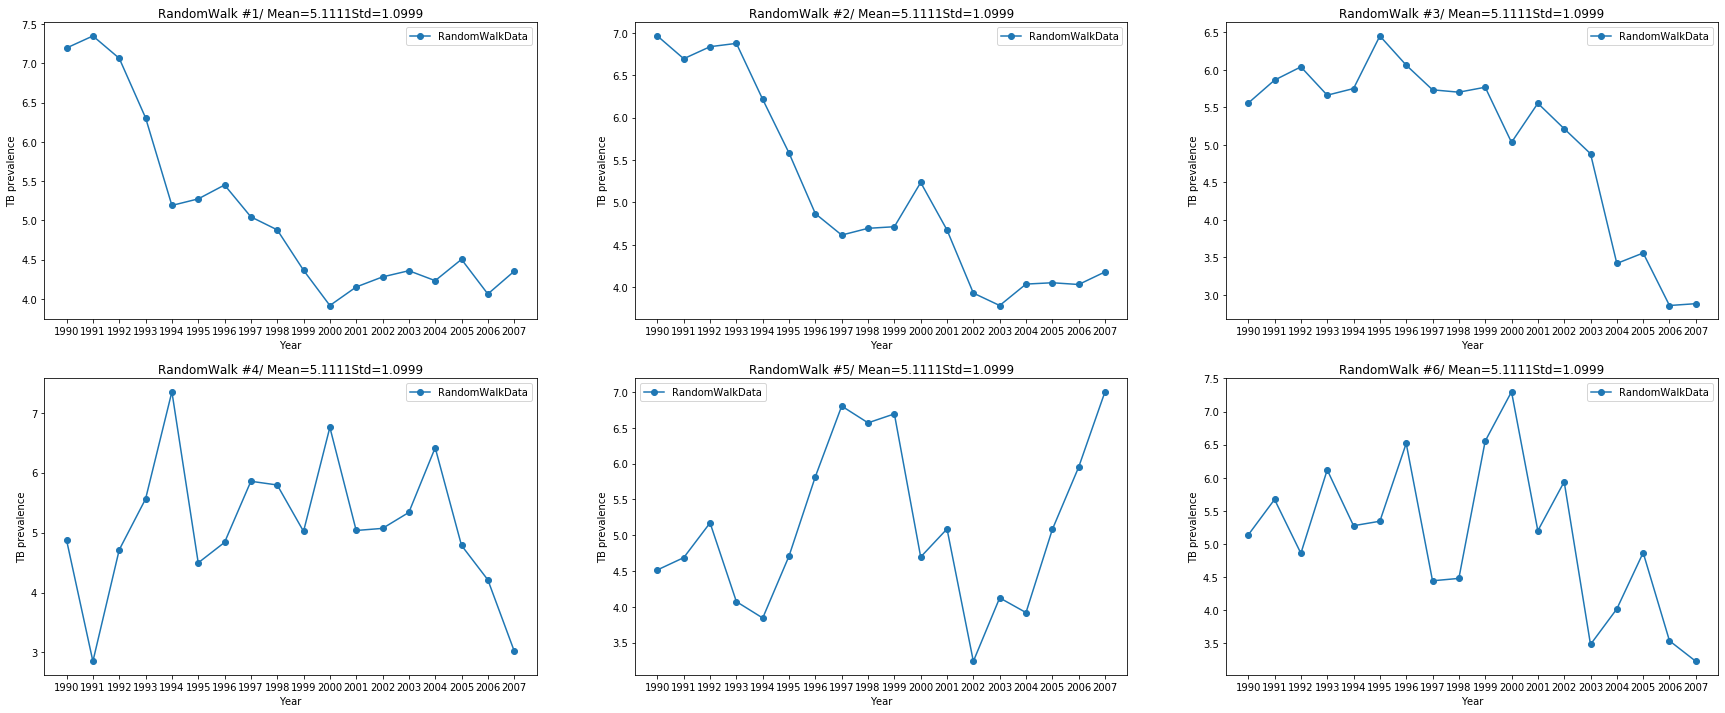

In [52]:
#Construct the function to perform random walk
#function take input of targetMean
def generate_random_work_pattern(wlakSteps,targetMean,targetStd):
  #Generate a normal distribution with mean=0, std=1, need 18 numbers
  randomNormalNums = np.random.normal(0, 1, wlakSteps) 
  #Cumulate the 18 values to simulate each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample
  cumRandomNormalNums = np.cumsum(randomNormalNums) 
  #get the scaled array which matches target std
  scaledArray = cumRandomNormalNums / cumRandomNormalNums.std() * targetStd
  #get the shifted array which matches target mean
  simulatedWalk = scaledArray - scaledArray.mean() + targetMean
  return simulatedWalk

######The following code is for test########
# testSum = 0
# testStdSum = 0
# #test 1000 walks and see how it works
# for i in range(1000):
#   a = generate_random_work_pattern(18,canada_mean,canada_std)
#   testSum += a.mean()
#   testStdSum += a.std()
# print(testSum/1000)
# print(testStdSum/1000)
###############################################

walk = generate_random_work_pattern(18,canada_mean,canada_std)
print("==>for a single RandomWalk, test its mean and std:")
print("Mean=",walk.mean(), " Std=",walk.std())
print("==========================================================")

#store the randomWalk
walkList = []

for i in range(6):
  walkList.append(generate_random_work_pattern(18,canada_mean,canada_std))


#adjust figure size
fig = plt.figure(figsize=(30, 12))

for i in range(6):
  randomWlakArray = walkList[i]

  #generate 6 random walk plot
  k = 11 # use the first 6 eigenVectors to reconstruct the image

  # plot  data
  plt.subplot(2, 3, i+1)
  #adjust the scale of the x axis be 1year/step
  plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
  plt.plot(X_years,randomWlakArray,marker='o',label="RandomWalkData")
  #add lables
  plt.xlabel("Year")
  plt.ylabel("TB prevalence")
  #add title
  titleStr = "RandomWalk #" + str(i+1) + "/ Mean=" + str("{0:.4f}".format(randomWlakArray.mean())) + "Std=" + str("{0:.4f}".format(randomWlakArray.std()))
  plt.legend()
  plt.title(titleStr)

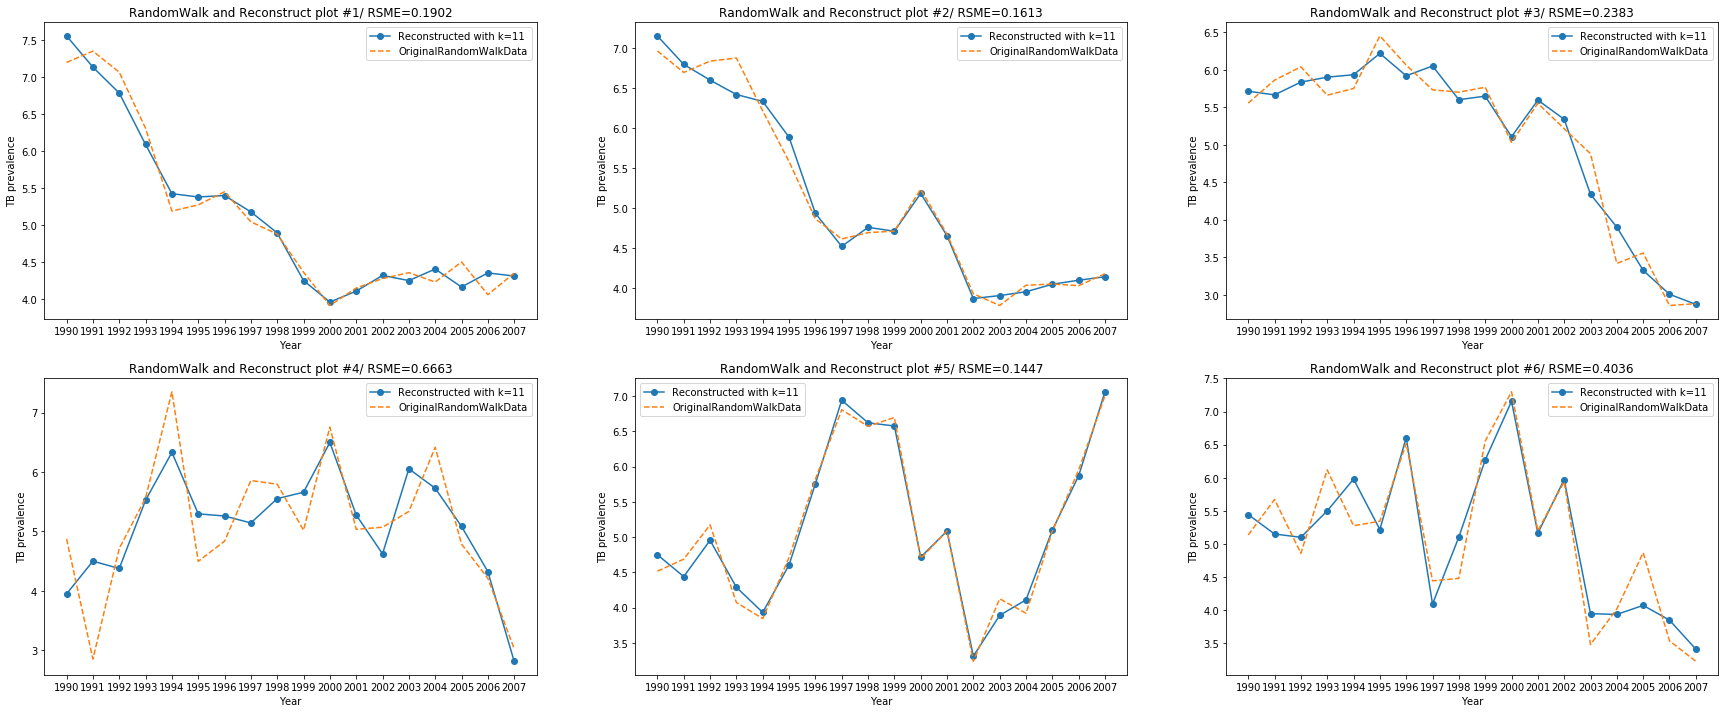

In [53]:
#adjust figure size
fig = plt.figure(figsize=(30, 12))

k = 11 # use the first 6 eigenVectors to reconstruct the image
reconstructList = []
for i in range(6):
  numEvs = k
  P = project(eigenVectors[:, 0:numEvs], np.array(walkList[i]).reshape(1, -1), mean)
  R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
  reconstructList.append(R.reshape(DataMatrix[0].shape))

#emply list to record RMSE for each plot
RMSE = []
for i in range(6):
  #calculate RMSE
  RMSE.append(sqrt(mean_squared_error(walkList[i],reconstructList[i])))

for i in range(6):
  randomWlakArray = walkList[i]

  #calculate the mean of the entire dataset
  mean= DataMatrix_std.mean(axis=0)

  # plot reconstructed data
  plt.subplot(2, 3, i+1)
  #adjust the scale of the x axis be 1year/step
  plt.xticks(np.arange(X_years[0], X_years[-1]+1, 1))
  plt.plot(X_years,reconstructList[i],marker='o',label="Reconstructed with k=11")
  plt.plot(X_years,randomWlakArray,linestyle = '--',label="OriginalRandomWalkData")
  #add lables
  plt.xlabel("Year")
  plt.ylabel("TB prevalence")
  #add title
  titleStr = "RandomWalk and Reconstruct plot #" + str(i+1) + "/ RSME=" + str("{0:.4f}".format(RMSE[i]))
  plt.legend()
  plt.title(titleStr)

### Question 6

Explain how could you use PCA to do anomaly detection.[1]

**Inspired from the Question5, to detect the anomalies, we can perform PCA to get the principle eigenvectors of the dataset and then perform data reconstruction for each data points. For those data points who have a relativly higher RMSE value than others, they have a higher chance of being an anomaly of the dataset. It is because that the principle components of the dataset (which represent the main feature components of the dataset) can not reconstruct this data well. Which means this data point has a higher chance of not belong to this dataset or has a higher noise in some dimension.**

## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi